# Vehicle dataset from cardekho
This dataset contains information about used cars listed on www.cardekho.com  
Kaggle: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [37]:
import numpy as np
import pandas as pd

In [38]:
DATASET_PATH = 'datasets/CAR_DETAILS_FROM_CAR_DEKHO.csv'
PREPARED_DATASET_PATH = 'datasets/CAR_DETAILS_FROM_CAR_DEKHO_prepared.csv'

##### Dataset's columns:  
1. name - Name of the cars
2. year - Year of the car when it was bought
3. selling_Price - Price at which the car is being sold
4. km_driven - Number of Kilometres the car is driven
6. fuel - Fuel type of car (petrol / diesel / CNG / LPG / electric)
7. seller_type - Tells if a Seller is Individual or a Dealer
8. transmission - Gear transmission of the car (Automatic/Manual)
9. owner - Number of previous owners of the car

Load dataset into dataframe

### Prepare the data

In [39]:
df = pd.read_csv(DATASET_PATH)

In [40]:
df.shape

(4340, 8)

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [42]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Convert "fuel", "seller_type", "transmission" & "owner" to binary data

In [44]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Save the results

In [45]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

### Visualize the data

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [48]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "darkgrey",
    "family": "Arial",
}

lable_font = {
    "fontsize": 12,
    "color": "darkgrey",
    "family": "Arial",
}

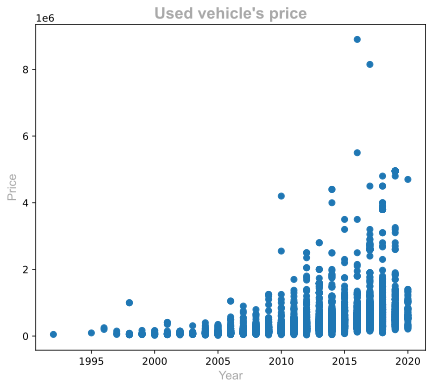

In [49]:
plt.figure(figsize=(7, 6))
plt.scatter(df['year'], df['selling_price'])

plt.title('Used vehicle\'s price', fontdict=title_font)
plt.xlabel('Year', fontdict=lable_font)
plt.ylabel('Price', fontdict=lable_font)

plt.show()

In [50]:
#sns.pairplot(df)

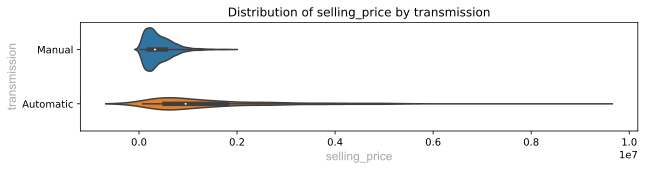

In [51]:
plt.figure(figsize=(10, 2))

sns.violinplot(df['selling_price'], df['transmission'])

plt.title('Distribution of selling_price by transmission')
plt.xlabel('selling_price', fontdict=lable_font)
plt.ylabel('transmission', fontdict=lable_font)

plt.show()

###  Drop outliers

In [52]:
df = df.loc[df['km_driven'] <= 40000]

In [53]:
df = df.loc[df['selling_price'] <= 400000]

In [54]:
df = df.loc[df['year'] >= 1995]

In [55]:
df.describe()

,year,selling_price,km_driven
count,525.000000,525.000000,525.000000
mean,2013.851429,254390.815238,26778.396190
std,4.153636,96806.816457,10531.839843
min,1996.000000,20000.000000,1.000000
25%,2012.000000,200000.000000,20000.000000
50%,2015.000000,270000.000000,28942.000000
75%,2017.000000,325000.000000,35000.000000
max,2020.000000,400000.000000,40000.000000


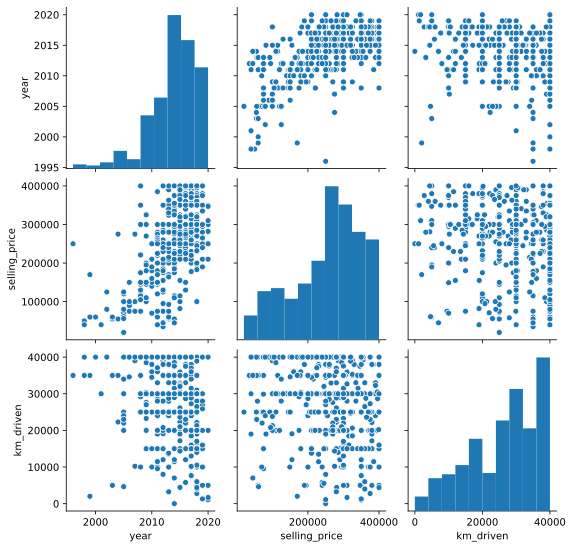

In [56]:
sns.pairplot(df[['year', 'selling_price', 'km_driven']])

In [57]:
df_dummies = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])[:5]
df_dummies

,name,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
10,Chevrolet Sail 1.2 Base,2015,260000,35000,0,0,0,1,0,1,0,0,1,1,0,0,0
23,Chevrolet Sail 1.2 Base,2015,260000,35000,0,0,0,1,0,1,0,0,1,1,0,0,0
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,0,1,0,0,0,1,0,0,1,0,0,1,0
57,Maruti Omni Maruti Omni MPI STD BSIII 5-STR W/...,2018,310000,28000,0,0,0,1,1,0,0,0,1,1,0,0,0
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,0,1,0,0,0,1,0,0,1,0,0,1,0


In [58]:
df_dummies.drop(['name', 'year', 'selling_price', 'km_driven'], axis='columns', inplace=True)
df_dummies

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
10,0,0,0,1,0,1,0,0,1,1,0,0,0
23,0,0,0,1,0,1,0,0,1,1,0,0,0
28,0,1,0,0,0,1,0,0,1,0,0,1,0
57,0,0,0,1,1,0,0,0,1,1,0,0,0
61,0,1,0,0,0,1,0,0,1,0,0,1,0


In [59]:
df = pd.concat([df, df_dummies], axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_CNG,fuel_Diesel,...,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
10,Chevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
23,Chevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
57,Maruti Omni Maruti Omni MPI STD BSIII 5-STR W/...,2018,310000,28000,Petrol,Dealer,Manual,First Owner,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [60]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

### Teach a linear regression model

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
fuel                             object
seller_type                      object
transmission                     object
owner                            object
fuel_CNG                        float64
fuel_Diesel                     float64
fuel_LPG                        float64
fuel_Petrol                     float64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
transmission_Automatic          float64
transmission_Manual             float64
owner_First Owner               float64
owner_Fourth & Above Owner      float64
owner_Second Owner              float64
owner_Third Owner               float64
dtype: object

In [63]:
df_prepared = df.select_dtypes(include=['int64'])

In [64]:
df_prepared.head()

,year,selling_price,km_driven
10,2015,260000,35000
23,2015,260000,35000
28,2013,390000,33000
57,2018,310000,28000
61,1996,250000,35000


In [65]:
X = df_prepared.loc[:, df_prepared.columns != 'selling_price']

In [66]:
X.columns

Index(['year', 'km_driven'], dtype='object')

In [67]:
X.head()

,year,km_driven
10,2015,35000
23,2015,35000
28,2013,33000
57,2018,28000
61,1996,35000


In [68]:
y = df_prepared.loc[:, df_prepared.columns == 'selling_price']
y.head()

,selling_price
10,260000
23,260000
28,390000
57,310000
61,250000


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(X_test)

In [74]:
check_test = pd.DataFrame({
    "y_test": y_test['selling_price'],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
4039,335000,322674.048901
368,325000,307846.044812
4305,150000,211989.906001
1859,260000,225554.745801
3706,250000,240021.845808
10,260000,267151.525410
3636,300000,294914.772128
1826,265000,279814.105005
967,350000,326824.445847
1983,150000,186664.746810


In [75]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
4039,335000,322674.048901,-12325.951099
368,325000,307846.044812,-17153.955188
4305,150000,211989.906001,61989.906001
1859,260000,225554.745801,-34445.254199
3706,250000,240021.845808,-9978.154192


In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(y_test, y_pred)

0.4841710784846761